In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("Company_x.xlsx")

In [3]:
data

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,99901565,Creditor 50,990495842,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,1.0,36.0,1,1,1,N,NaN,NaN,NaN
406419,99901565,Creditor 50,990495843,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,1.0,37.0,0,1,1,N,NaN,NaN,NaN
406420,99901565,Creditor 50,990495844,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,1.0,71.0,1,1,1,N,NaN,NaN,NaN
406421,99901565,Creditor 50,990495845,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,1.0,38.0,1,1,1,N,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

In [5]:
data.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'ClosureReason',
       'InBankruptcy', 'AccountInsolvencyType', 'CustomerInsolvencyType',
       'IsLegal', 'LastPaymentAmount', 'LastPaymentMethod', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses', 'IsStatBarred',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

### 1) Dropping Unnecessary Columns

In [6]:
data.drop(columns=['Unnamed: 22','Unnamed: 23','Unnamed: 24'], inplace=True)

In [7]:
data.sample(5)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
231378,3011124,Creditor 44,30492733,0.00,156940.07,156940.07,0.65,Bank - Other,SETTLED FOR LESS,NaN,...,NaN,N,50.0,Automatic Payment,2.0,55.0,2,2,4,N
125233,3010600,Creditor 17,30254513,878.74,878.74,878.74,3.07,Utilities/Telco - Other,PASSIVE,NaN,...,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
164765,3010730,Creditor 33,30374446,557.00,557.00,557.00,3.60,Utilities/Telco - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,56.0,0,0,2,Y
192792,3010949,Creditor 35,30412524,0.00,821.53,903.68,9.68,Credit Cards,PAID_IN_FULL,NaN,...,NaN,N,50.0,Cheque,1.0,35.0,1,0,1,N
303334,99901306,Creditor 47,990187603,677.31,615.74,615.74,2.32,Utilities/Telco - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,42.0,0,0,1,Y


In [8]:
data.duplicated().sum()

0

In [9]:
data['AccountID'].nunique()

406423

In [10]:
data['EntityID'].nunique()

229

In [11]:
data['OriginalCreditor[Redacted]'].nunique()

52

* For now let's keep these columns seperate and see if we need to combine them for our future use or remove it altogether

### 2) Null Values check

In [12]:
data.isnull().mean()*100

EntityID                       0.000000
OriginalCreditor[Redacted]     0.000000
AccountID                      0.000000
CurrentBalance                 0.000000
DebtLoadPrincipal              0.000000
Balanaceatdebt_load            0.000000
PurchasePrice                  0.662364
ProductOrDebtType              0.000000
CollectionStatus               0.000000
ClosureReason                 97.778177
InBankruptcy                   0.000000
AccountInsolvencyType         99.929876
CustomerInsolvencyType        97.900955
IsLegal                        0.000000
LastPaymentAmount             74.416556
LastPaymentMethod             74.416556
NumLiableParties               0.030018
CustomerAge                    7.254019
NumPhones                      0.000000
NumEmails                      0.000000
NumAddresses                   0.000000
IsStatBarred                   0.000000
dtype: float64

#### 2.A. Complete case analysis:

In [13]:
cca_cols = [var for var in data.columns if data[var].isnull().mean()*100 < 5 and data[var].isnull().mean()*100 > 0]
cca_cols

['PurchasePrice', 'NumLiableParties']

In [14]:
len(data[cca_cols].dropna()) / len(data)

0.9930811002330084

In [15]:
df_1 = data[cca_cols].dropna()

In [16]:
df_1

,PurchasePrice,NumLiableParties
0,4.22,1.0
1,4.22,1.0
2,4.22,1.0
3,4.22,1.0
4,4.22,1.0
...,...,...
406418,7.38,1.0
406419,7.38,1.0
406420,7.38,1.0
406421,7.38,1.0


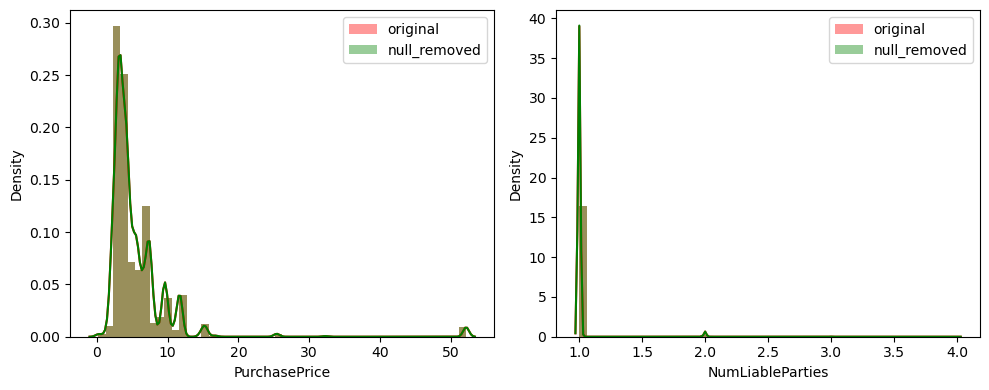

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(data['PurchasePrice'], color='red', label='original')
sns.distplot(df_1['PurchasePrice'], color='green', label='null_removed')

plt.legend()

plt.subplot(122)
sns.distplot(data['NumLiableParties'], color='red', label='original')
sns.distplot(df_1['NumLiableParties'], color='green', label='null_removed')

plt.legend()

plt.tight_layout()
plt.show()

* As evident from above, by dropping these values, there won't be any harm to the distribution of our data.
* This implies that the data is MCAR(Missing Completely at Random).
* Hence, we resort to dropping these null values.

In [18]:
data.dropna(subset=['PurchasePrice','NumLiableParties'], inplace=True, ignore_index=True)

In [19]:
data.shape

(403611, 22)

* **Thus, Null Values for 'PurchasePrice', 'NumLiableParties' are handled!!**

#### 2.B. Analysis of CustomerAge column

In [20]:
data.isnull().mean()*100  

EntityID                       0.000000
OriginalCreditor[Redacted]     0.000000
AccountID                      0.000000
CurrentBalance                 0.000000
DebtLoadPrincipal              0.000000
Balanaceatdebt_load            0.000000
PurchasePrice                  0.000000
ProductOrDebtType              0.000000
CollectionStatus               0.000000
ClosureReason                 97.799614
InBankruptcy                   0.000000
AccountInsolvencyType         99.929883
CustomerInsolvencyType        97.898719
IsLegal                        0.000000
LastPaymentAmount             74.437763
LastPaymentMethod             74.437763
NumLiableParties               0.000000
CustomerAge                    7.201736
NumPhones                      0.000000
NumEmails                      0.000000
NumAddresses                   0.000000
IsStatBarred                   0.000000
dtype: float64

In [21]:
[var for var in  data.columns if data[var].isnull().mean()*100 > 5 and data[var].isnull().mean()*100 < 10]

['CustomerAge']

* 'CustomerAge' column shows around 7% of missing values which means roughly 28000 data points are at stake. Therefore, we will first analyse the impact of removal of these data point and later, see how imputation affects the data distribution.

##### i. Dropping the Missing Values

In [22]:
df_2 = data['CustomerAge'].dropna()

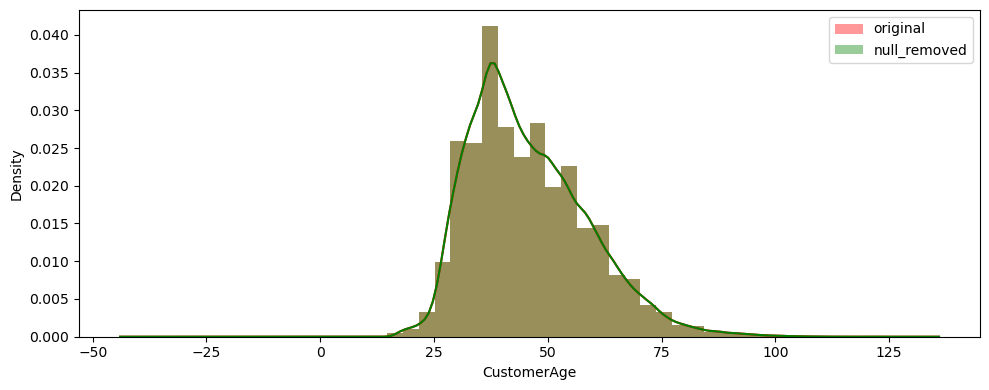

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(111)
sns.distplot(data['CustomerAge'], color='red', label='original')
sns.distplot(df_2, color='green', label='null_removed')

plt.legend()
plt.tight_layout()
plt.show()

* The Distribution looks fairly unimpacted...

##### ii. Mean Imputation(Univariate)
* Before Mean Imputation of this column, it first needs to be treated for the outliers. So, let's see for that.

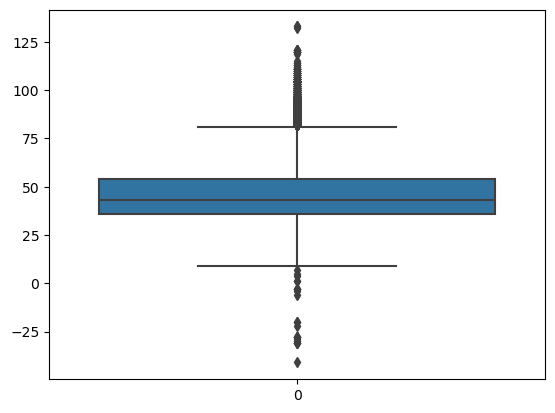

In [24]:
sns.boxplot(data['CustomerAge'])
plt.show()

In [25]:
q1 = data['CustomerAge'].quantile(0.25)
q3 = data['CustomerAge'].quantile(0.75)
iqr = q3 - q1
upper_lim = q3 + 1.5*iqr
lower_lim = q1 - 1.5*iqr

In [26]:
upper_lim,lower_lim

(81.0, 9.0)

In [27]:
capped_age = np.where(data['CustomerAge']>upper_lim, upper_lim,
                     (np.where(data['CustomerAge']<lower_lim, lower_lim, data['CustomerAge'])))

In [28]:
capped_age

array([53., nan, nan, ..., 71., 38., 30.])

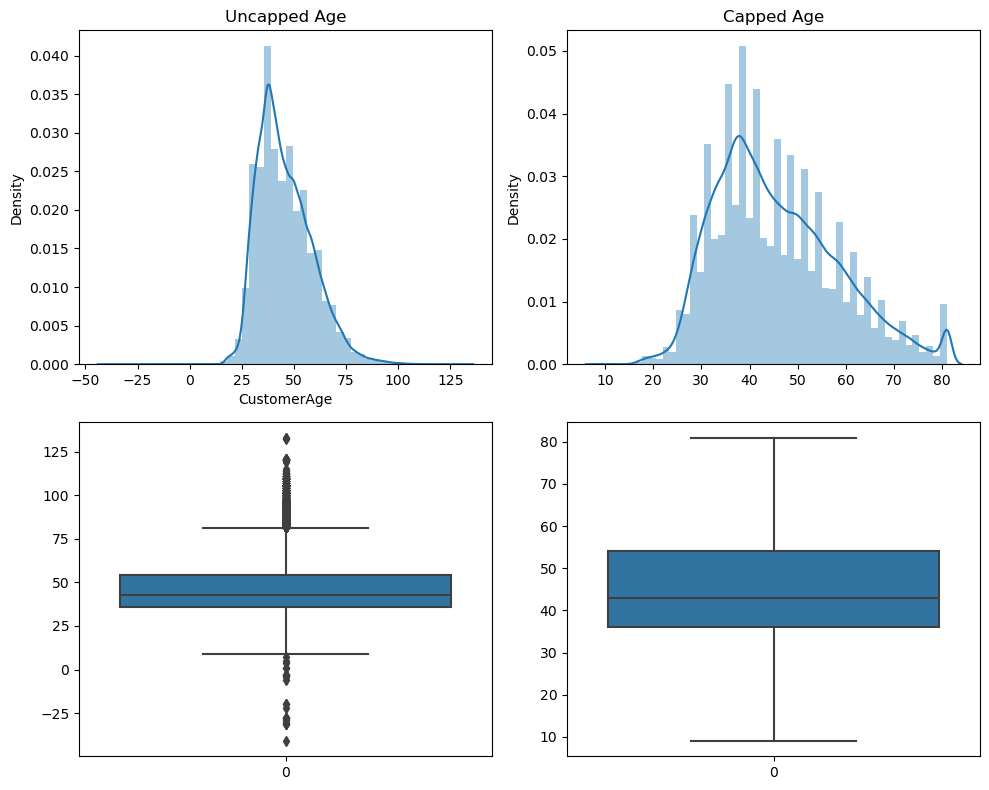

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.distplot(data['CustomerAge'])
plt.title("Uncapped Age")

plt.subplot(222)
sns.distplot(capped_age)
plt.title("Capped Age")

plt.subplot(223)
sns.boxplot(data['CustomerAge'])

plt.subplot(224)
sns.boxplot(capped_age)

plt.tight_layout()
plt.show()

* Removal of outliers would have cost huge data, hence we used capping here. Applied capping using IQR method. The distribution also looks fairly "Normal" with a little bump on the higher value side.
* Now focusing on imputation of null values...

In [30]:
mean_imputed = pd.DataFrame(capped_age).fillna(capped_age.mean())

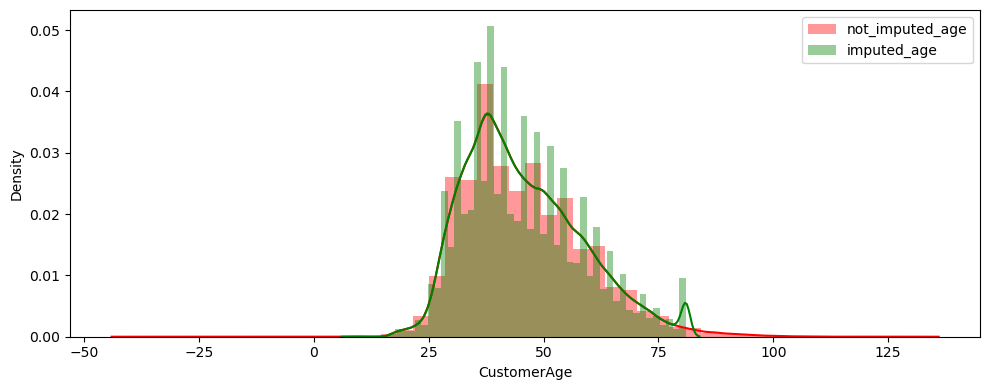

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(111)
sns.distplot(data['CustomerAge'], color='red',label='not_imputed_age')
sns.distplot(mean_imputed, color='green',label='imputed_age')
plt.tight_layout()
plt.legend()
plt.show()

In [32]:
mean_imputed.var(),data['CustomerAge'].var()

(0    160.392406
 dtype: float64,
 167.82682396357583)

* Mean imputation is causing change in variance and clearly visible change in the distribution as well.
* Let's try with other methods.

##### iii. Random Sample Imputation

In [33]:
data['CustomerAge_imputed'] = data['CustomerAge']

In [34]:
data['CustomerAge_imputed'][data['CustomerAge_imputed'].isnull()] = data['CustomerAge'].dropna().sample(data['CustomerAge'].isnull().sum()).values
#This will generate random samples from CustomerAge column

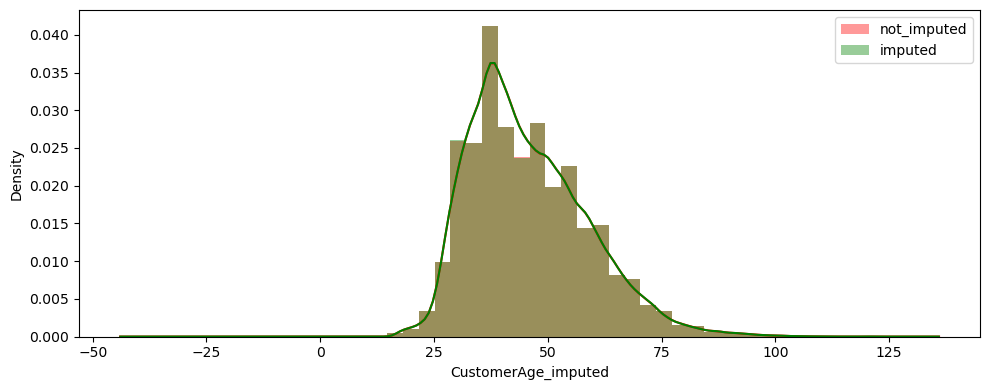

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(111)
sns.distplot(data['CustomerAge'], color='red', label='not_imputed')
sns.distplot(data['CustomerAge_imputed'], color='green', label='imputed')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
data['CustomerAge_imputed'].var(), data['CustomerAge'].var()

(167.74926732008802, 167.82682396357583)

* Data distribution is preserved in this method

##### iv. KNN Imputer(Multivariate)

In [37]:
"""from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, weights='distance')"""

"from sklearn.impute import KNNImputer\nknn = KNNImputer(n_neighbors=5, weights='distance')"

In [38]:
"""knn_imputed = knn.fit_transform(data[['CustomerAge']])"""

"knn_imputed = knn.fit_transform(data[['CustomerAge']])"

In [39]:
"""plt.figure(figsize=(10,4))
plt.subplot(111)
sns.distplot(data['CustomerAge'], color='red', label='not_imputed')
sns.distplot(knn_imputed, color='green', label='imputed')
plt.legend()
plt.tight_layout()
plt.show()"""

"plt.figure(figsize=(10,4))\nplt.subplot(111)\nsns.distplot(data['CustomerAge'], color='red', label='not_imputed')\nsns.distplot(knn_imputed, color='green', label='imputed')\nplt.legend()\nplt.tight_layout()\nplt.show()"

In [40]:
"""knn_imputed.var(), data['CustomerAge'].var()"""

"knn_imputed.var(), data['CustomerAge'].var()"

* Again,KNN imputer is having distorting effect on the data. Also, this method is very time consuming.
* So far, "Random Sample Imputer" has worked best for us, so we will move ahead with it for now.

In [41]:
data

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,CustomerAge_imputed
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Y,10.00,Cheque,1.0,53.0,0,0,1,N,53.0
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,N,NaN,NaN,1.0,NaN,0,0,1,Y,41.0
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,N,5.37,Cheque,1.0,NaN,1,0,1,N,62.0
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,N,NaN,NaN,1.0,NaN,1,0,1,Y,41.0
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Y,5.00,Cheque,1.0,46.0,2,0,1,Y,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403606,99901565,Creditor 50,990495842,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,NaN,...,N,NaN,NaN,1.0,36.0,1,1,1,N,36.0
403607,99901565,Creditor 50,990495843,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,NaN,...,N,NaN,NaN,1.0,37.0,0,1,1,N,37.0
403608,99901565,Creditor 50,990495844,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,NaN,...,N,NaN,NaN,1.0,71.0,1,1,1,N,71.0
403609,99901565,Creditor 50,990495845,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,NaN,...,N,NaN,NaN,1.0,38.0,1,1,1,N,38.0


In [42]:
data['CustomerAge'][data['CustomerAge'].isnull()] = data['CustomerAge'].dropna().sample(data['CustomerAge'].isnull().sum()).values

In [43]:
data['CustomerAge'].isnull().sum()

0

In [44]:
data.drop(columns=['CustomerAge_imputed'],axis=1,inplace=True)

* **Null values for "CustomerAge" column are imputed.**

#### 2.C. Columns with 97-99% Null Values

In [45]:
[var for var in data.columns if data[var].isnull().mean()*100 > 70]

['ClosureReason',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'LastPaymentAmount',
 'LastPaymentMethod']

In [46]:
drop_col = [var for var in data.columns if data[var].isnull().mean()*100 > 95]

In [47]:
drop_col

['ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType']

In [48]:
data['ClosureReason'].unique()

array([nan, 'Insolvent', 'Statute Barred', 'Uneconomical to pursue',
       'Small Balance', 'Other Reason - Please see notes', 'Deceased',
       'Client Instructions', 'Company Struck Off', 'Fraud',
       'Sensitive Issue', 'Incarcerated', 'Paid', 'Duplicate Debt',
       'Disputes/Legal Case Lost'], dtype=object)

* The column "ClosureReason" could add for our model to learn significantly, although the data is less. Hence, we won't remove this column for the time being and will handle it at the time of encoding.

In [49]:
data['AccountInsolvencyType'].unique()

array([nan, 'BANKRUPTCY_NOTICE', 'LIQUIDATION_NOP',
       'BANKRUPTCY_CREDITOR_UNION_PETITION',
       'BANKRUPTCY_CREDITOR_UNION_PETITION | BANKRUPTCY_NOTICE',
       'BANKRUPTCY_NOTICE | LIQUIDATION_NOP'], dtype=object)

In [50]:
data['CustomerInsolvencyType'].unique()

array([nan, 'BANKRUPT', 'NO_ASSET_PROCEDURE', 'STRUCK_OFF',
       'APPLICATION_FOR_LIQUIDATION', 'LIQUIDATION',
       'BANKRUPT | NO_ASSET_PROCEDURE', 'RECEIVERSHIP',
       'BANKRUPT | LIQUIDATION', 'BANKRUPT | STRUCK_OFF',
       'APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP',
       'LIQUIDATION | STRUCK_OFF',
       'APPLICATION_FOR_LIQUIDATION | STRUCK_OFF',
       'LIQUIDATION | RECEIVERSHIP'], dtype=object)

* Just as above mentioned, "AccountInsolvencyType", "CustomerInsolvencyType" seem to have potential in adding to the final StatuteBarred status. Thus, for these cols as well we will handle at the time of encoding.

#### 2.D. Analysis for "LastPaymentAmount","LastPaymentMethod" columns

In [51]:
data['LastPaymentAmount'].isnull().sum()

300439

In [52]:
data['LastPaymentMethod'].value_counts()

LastPaymentMethod
Cheque                      53583
Automatic Payment           27181
Direct Credit                8765
Direct Debit                 5457
Unknown                      3684
Cash                         3343
Credit Card / Debit Card     1121
Direct Transfer                31
Mastercard                      7
Name: count, dtype: int64

In [53]:
#data[data['LastPaymentMethod']=='Unknown']['LastPaymentAmount'].values

* For these two columns, we will handle them using encoding techniques.

### 3) EDA

In [54]:
data.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'ClosureReason',
       'InBankruptcy', 'AccountInsolvencyType', 'CustomerInsolvencyType',
       'IsLegal', 'LastPaymentAmount', 'LastPaymentMethod', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses',
       'IsStatBarred'],
      dtype='object')

In [55]:
num_cols = []
for i in data.columns:
    if data[i].dtype != object:
        num_cols.append(i)
print(num_cols)

['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'LastPaymentAmount', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses']


In [56]:
num_cols.remove('EntityID')

In [57]:
num_cols.remove('AccountID')

In [58]:
num_cols

['CurrentBalance',
 'DebtLoadPrincipal',
 'Balanaceatdebt_load',
 'PurchasePrice',
 'LastPaymentAmount',
 'NumLiableParties',
 'CustomerAge',
 'NumPhones',
 'NumEmails',
 'NumAddresses']

In [59]:
cat_cols = []
for i in data.columns:
    if data[i].dtype == object:
        cat_cols.append(i)
print(cat_cols)

['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'ClosureReason', 'InBankruptcy', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'IsLegal', 'LastPaymentMethod', 'IsStatBarred']


#### 3.A. Numerical Columns:

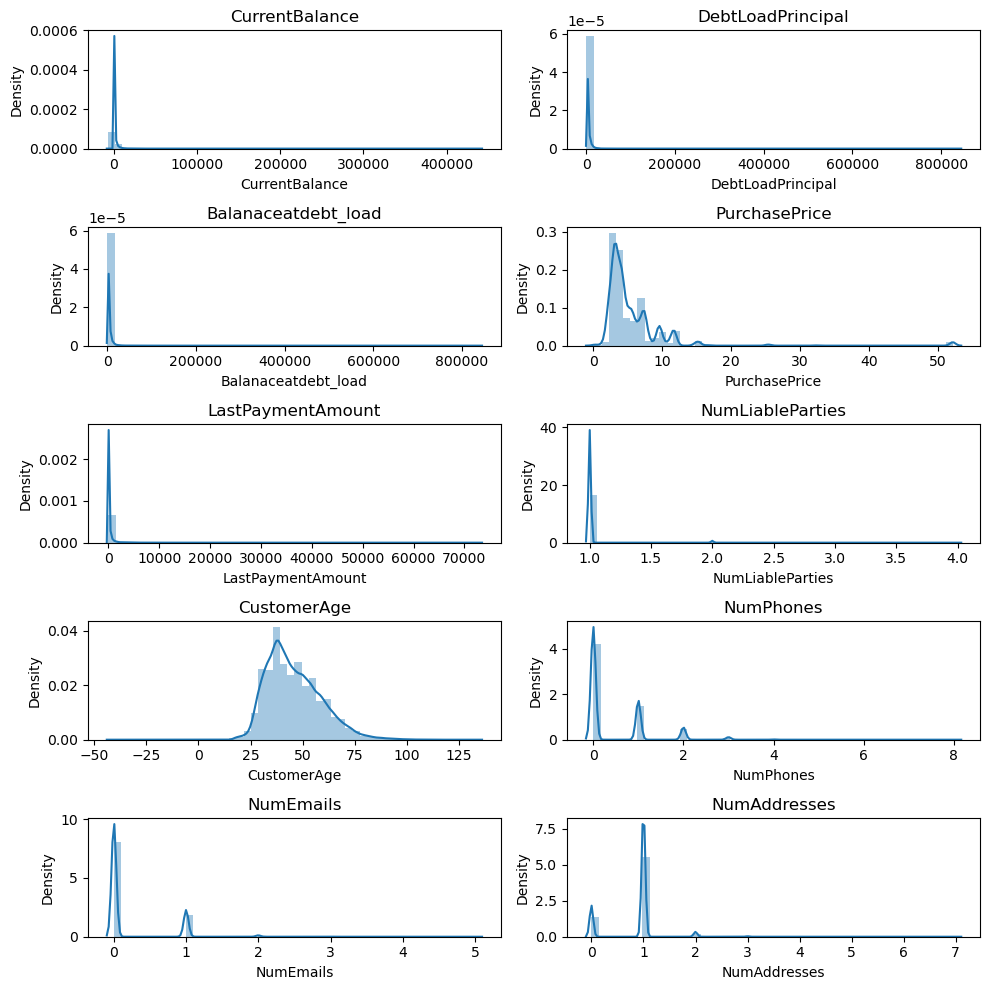

In [60]:
plt.figure(figsize=(10,10))
ax=1
for i in num_cols:
    plt.subplot(5,2,ax)
    sns.distplot(data[i])
    plt.title(i)
    ax+=1
plt.tight_layout()
plt.show()

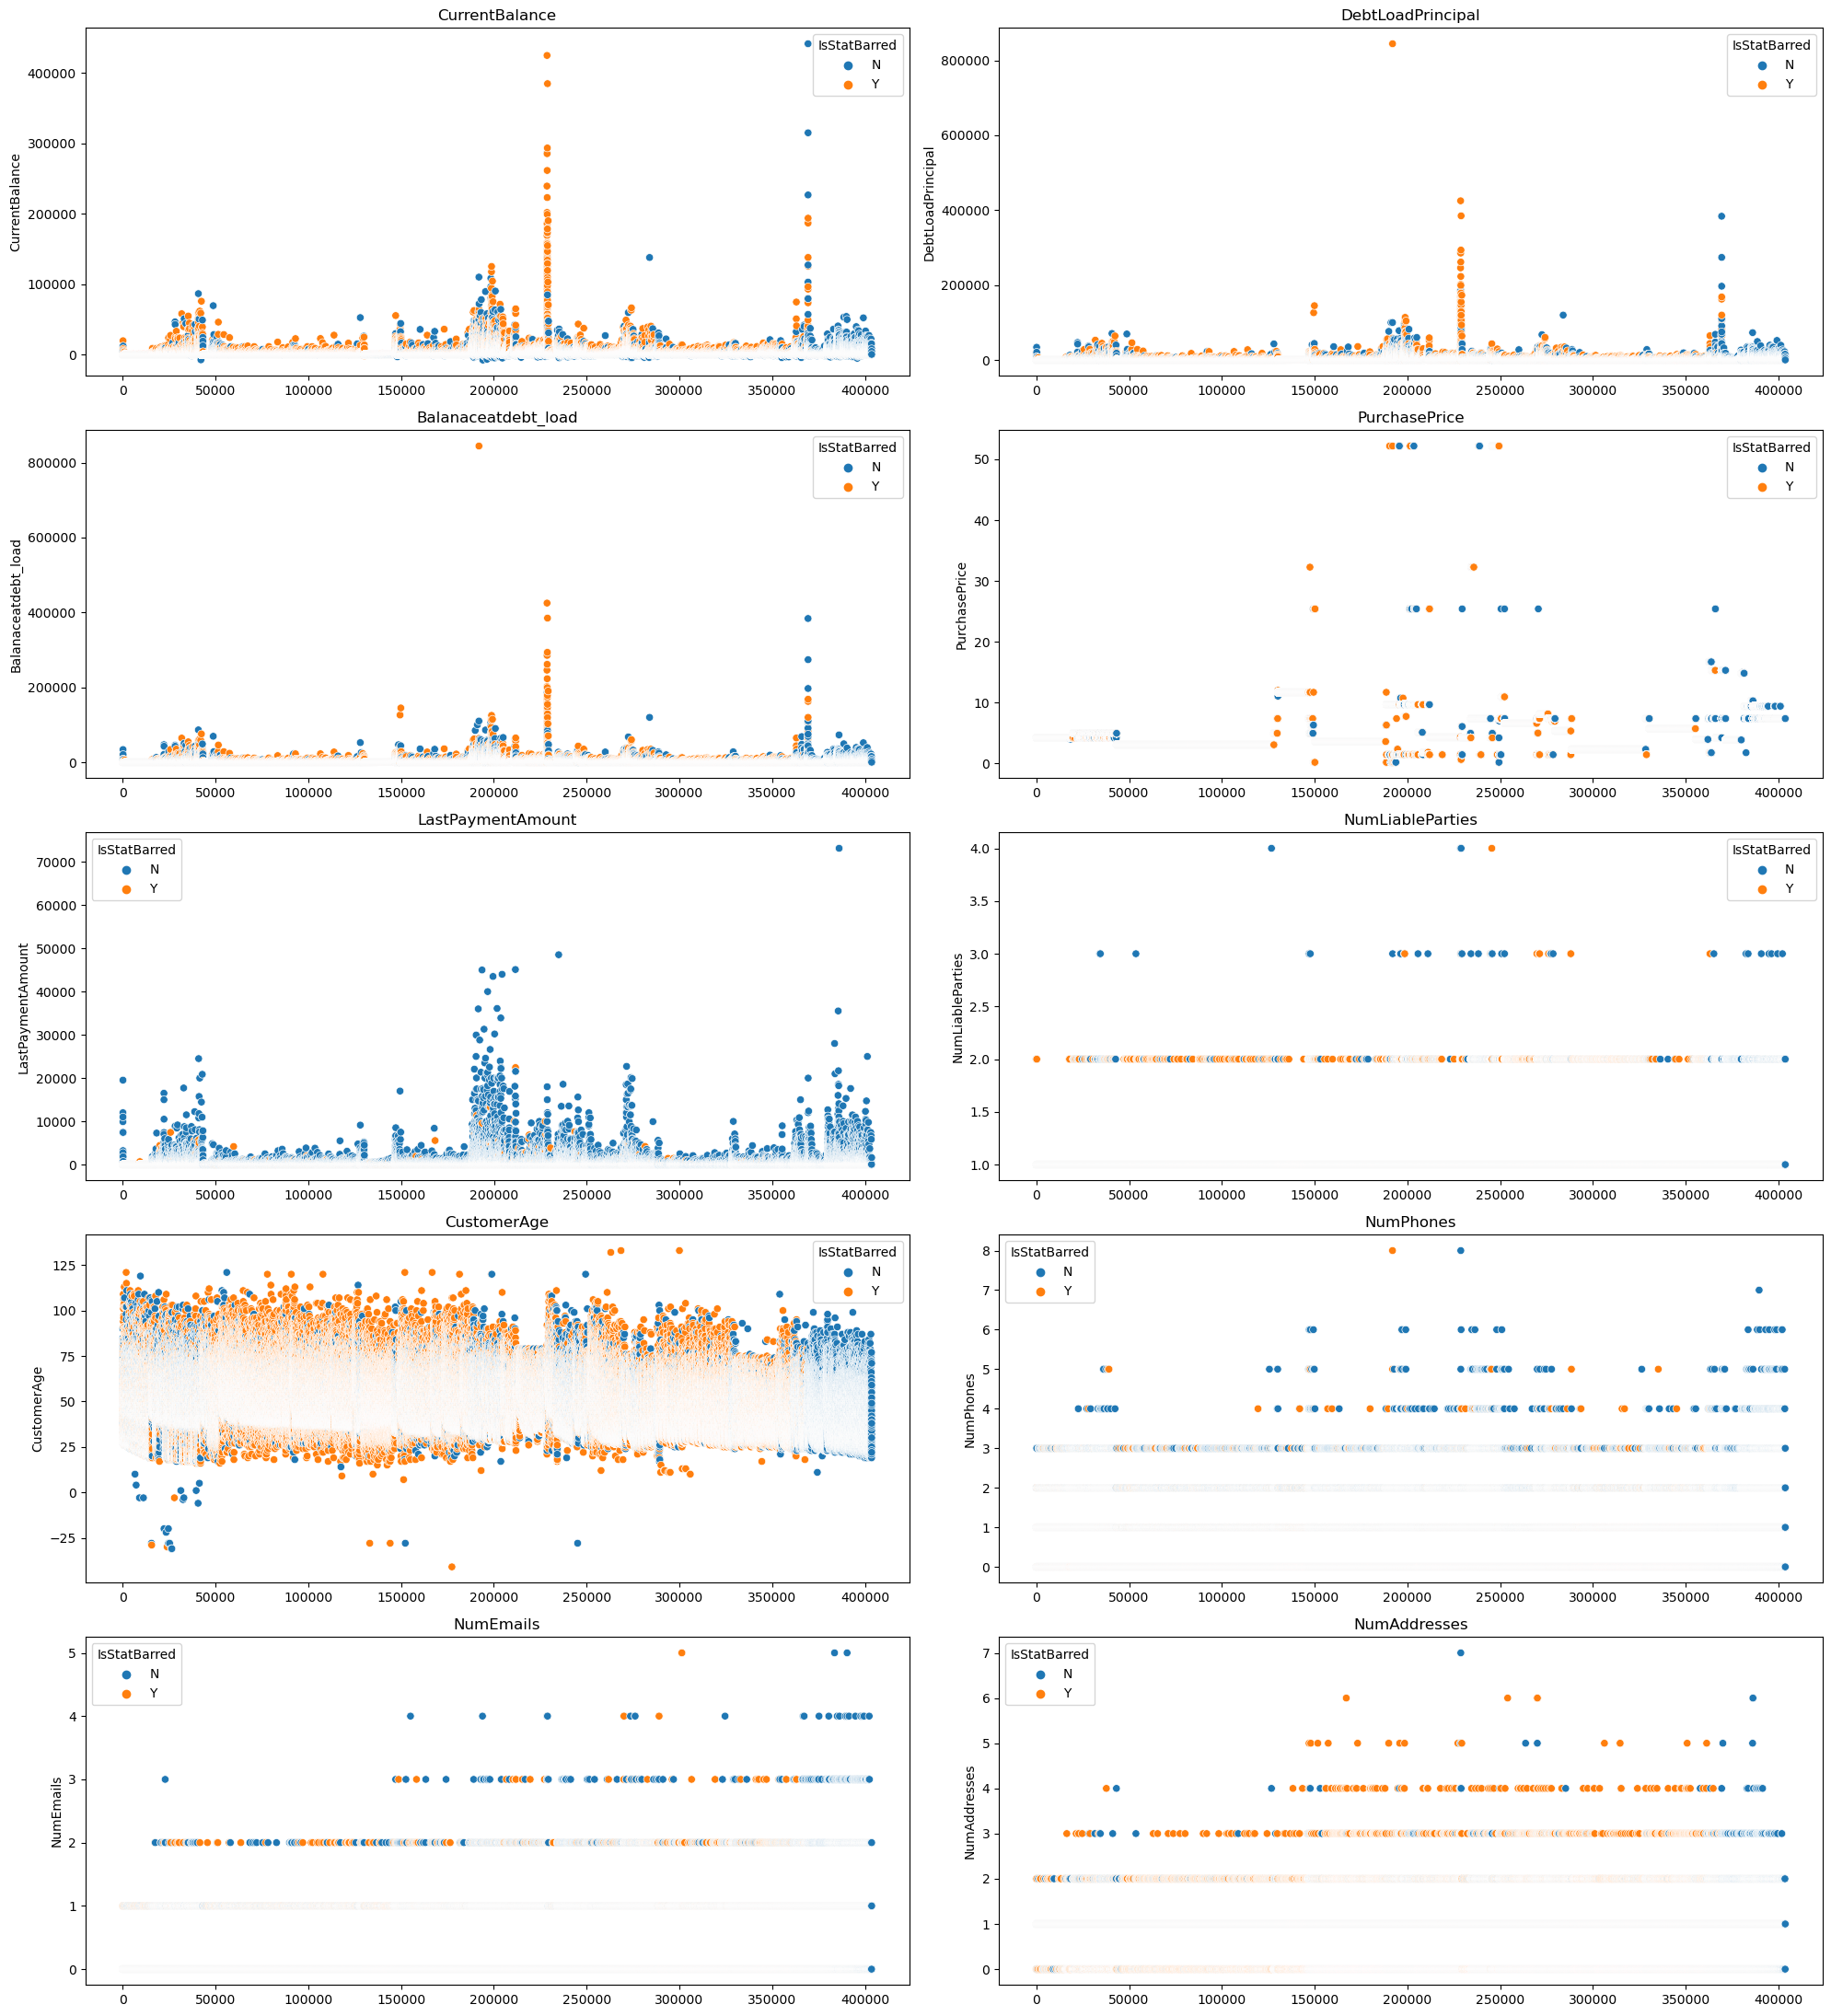

In [61]:
plt.figure(figsize=(20,22))
ax=1
for i in num_cols:
    plt.subplot(5,2,ax)
    sns.scatterplot(x=data[i].index, y=data[i],hue=data['IsStatBarred'])
    plt.title(i)
    ax+=1
plt.tight_layout()
plt.show()

* From above analysis columns that "might" need Outlier Treatment are:
1. CurrentBalance,
2. DebtLoadPrincipal,
3. Balanaceatdebt_load,
4. PurchasePrice,
5. CustomerAge,
6. LastPaymentAmount (decide later)

In [62]:
"""def outlier_cap(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    
    return ul,ll"""

'def outlier_cap(col):\n    q1 = data[col].quantile(0.25)\n    q3 = data[col].quantile(0.75)\n    iqr = q3 - q1\n    \n    ul = q3 + 1.5 * iqr\n    ll = q1 - 1.5 * iqr\n    \n    return ul,ll'

In [63]:
#col_outliers = ['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'CustomerAge']
#col_outliers = ['CustomerAge']
#list_caps = list(map(outlier_cap, col_outliers))

In [64]:
#list(zip(col_outliers,list_caps))

In [65]:
#data['CurrentBalance'] = np.clip(data['CurrentBalance'],ll,ul)

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierCapper(BaseEstimator, TransformerMixin):
    
    def __init__(self, lower_limit=None, upper_limit=None):
        self.lower_limit = lower_limit
        self.upper_limit = upper_limit
        
    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        
        if self.lower_limit == None:
            self.lower_limit = q1 - 1.5 * iqr
            
        if self.upper_limit == None:
            self.upper_limit = q3 + 1.5 * iqr

        #print(self.upper_limit,self.lower_limit)
            
        return self
         
    def transform(self, X):
        X_clipped =  np.clip(X, self.lower_limit, self.upper_limit)
        
        return X_clipped

In [67]:
df = data.copy()
df

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,N,NaN,NaN,1.0,31.0,0,0,1,Y
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,NaN,N,5.37,Cheque,1.0,33.0,1,0,1,N
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,N,NaN,NaN,1.0,29.0,1,0,1,Y
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403606,99901565,Creditor 50,990495842,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,36.0,1,1,1,N
403607,99901565,Creditor 50,990495843,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,37.0,0,1,1,N
403608,99901565,Creditor 50,990495844,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,71.0,1,1,1,N
403609,99901565,Creditor 50,990495845,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,NaN,...,NaN,N,NaN,NaN,1.0,38.0,1,1,1,N


In [68]:
#for col in col_outliers:
out_cap = OutlierCapper()
data['CustomerAge'] = out_cap.fit_transform(data['CustomerAge'])

In [69]:
"""trf1 = ColumnTransformer([
    ('Outlier_Capper',OutlierCapper(),['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'CustomerAge'])
],remainder='passthrough')"""

"trf1 = ColumnTransformer([\n    ('Outlier_Capper',OutlierCapper(),['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'CustomerAge'])\n],remainder='passthrough')"

In [70]:
"""plt.figure(figsize=(10,10))
ax=1
for i in col_outliers:
    plt.subplot(3,2,ax)
    sns.distplot(data[i])
    #plt.title(i)
    ax+=1
plt.tight_layout()
plt.show()"""

'plt.figure(figsize=(10,10))\nax=1\nfor i in col_outliers:\n    plt.subplot(3,2,ax)\n    sns.distplot(data[i])\n    #plt.title(i)\n    ax+=1\nplt.tight_layout()\nplt.show()'

* **Outliers for "CustromerAge" column have been treated!!**

#### 3.B. Categorical Columns:

In [71]:
cat_cols

['OriginalCreditor[Redacted]',
 'ProductOrDebtType',
 'CollectionStatus',
 'ClosureReason',
 'InBankruptcy',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'IsLegal',
 'LastPaymentMethod',
 'IsStatBarred']

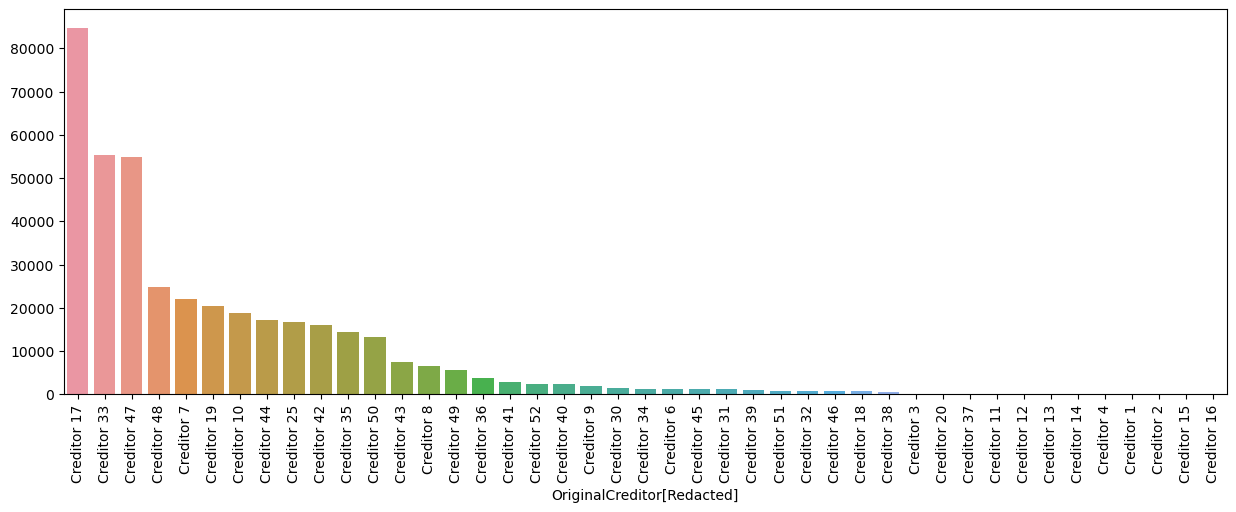

In [72]:
x = data['OriginalCreditor[Redacted]'].value_counts().index
y = data['OriginalCreditor[Redacted]'].value_counts().values

plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y)
plt.xticks(rotation='vertical')
plt.show()

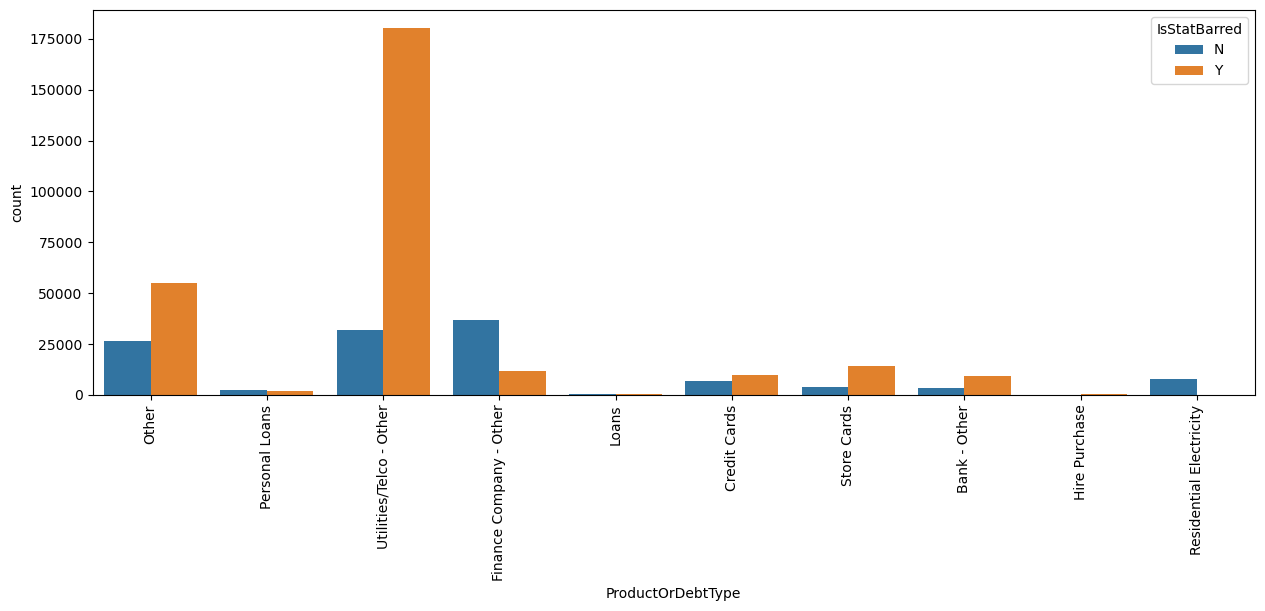

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['ProductOrDebtType'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* Product/DebtType: **Utilities/Teleco-other** shows the maximum number of debts being Statute Barred followed by **Other**(Product/DebtType), while **Residential Electricity** with almost none Statute Barred entry. This is followed by **Loans**
* **Finance Company** has the most number of products with Not Statute Barred status.

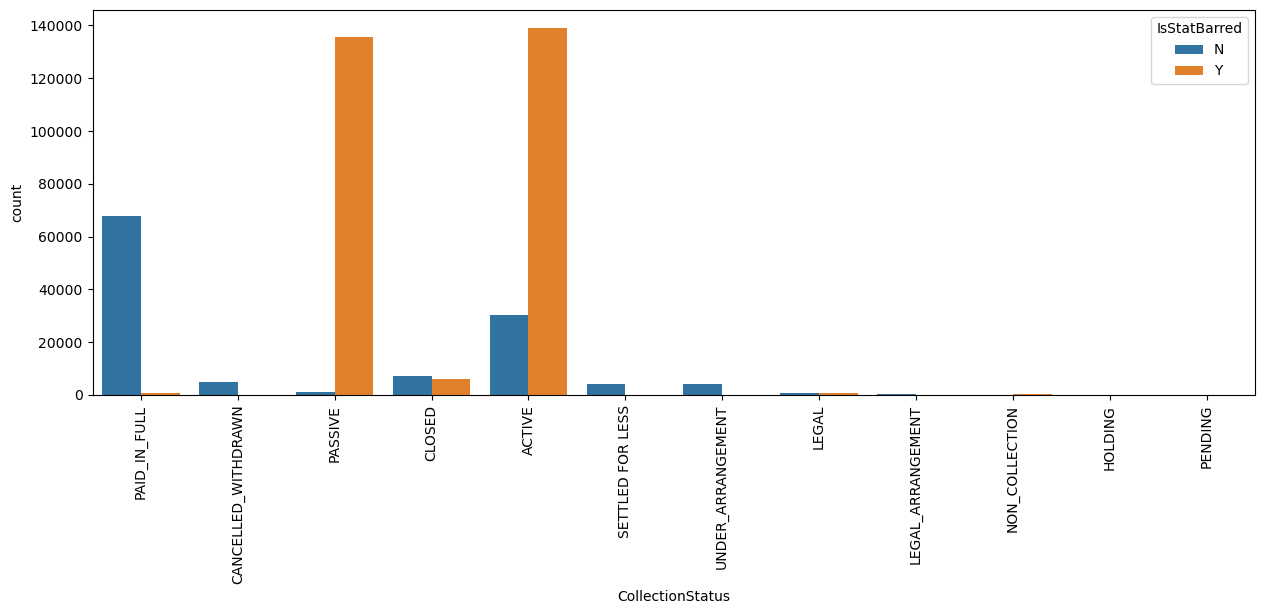

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['CollectionStatus'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* CollectionStatus: **ACTIVE** shows the maximum number of debts being Statute Barred followed by **PASSIVE**status, while **PENDING AND HOLDING** with almost none Statute Barred entry.
* **PAID_IN_FULL** as CollectionStatus shows maximum products with Not Statute Barred status.

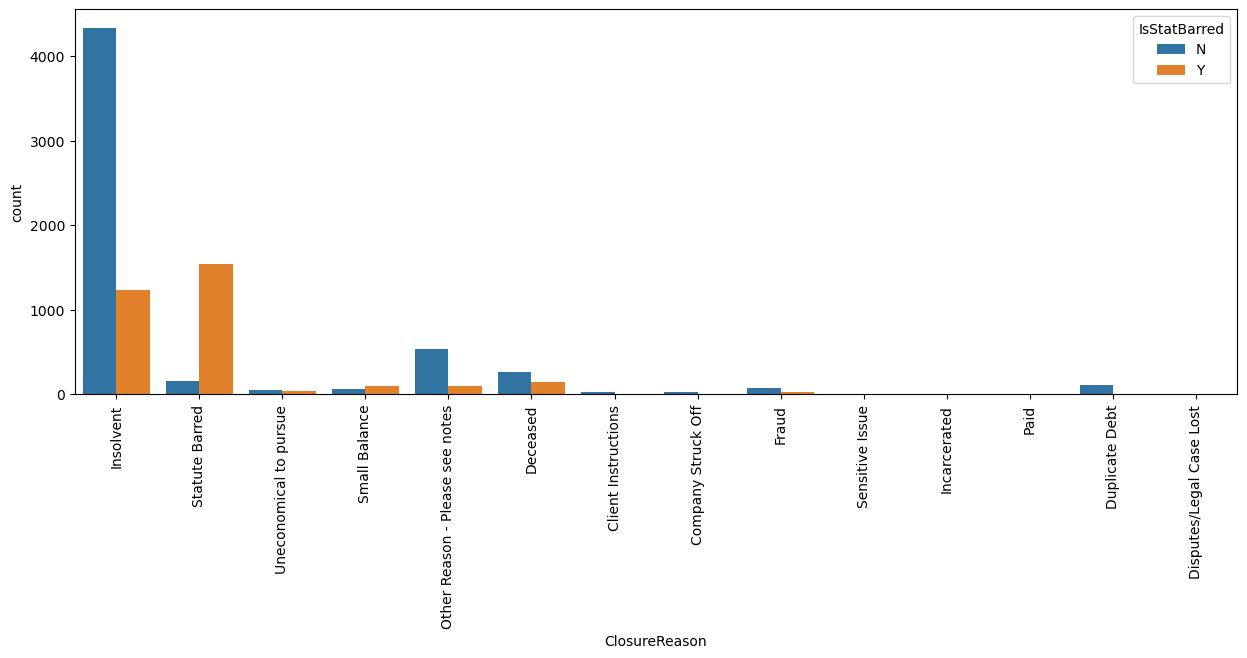

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['ClosureReason'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* ClosureReason: **Insolvent** shows the most tendency of "not" being Statute Barred. Whereas **Others, Deceased, Duplicate Debt, Statue Barred** as ClosureReason of the debt account has disproportinately smaller share in being "not" Statute Barred.
* Interestingly, being **Deceased** isn't much contributing to the debt being Statute Barred.

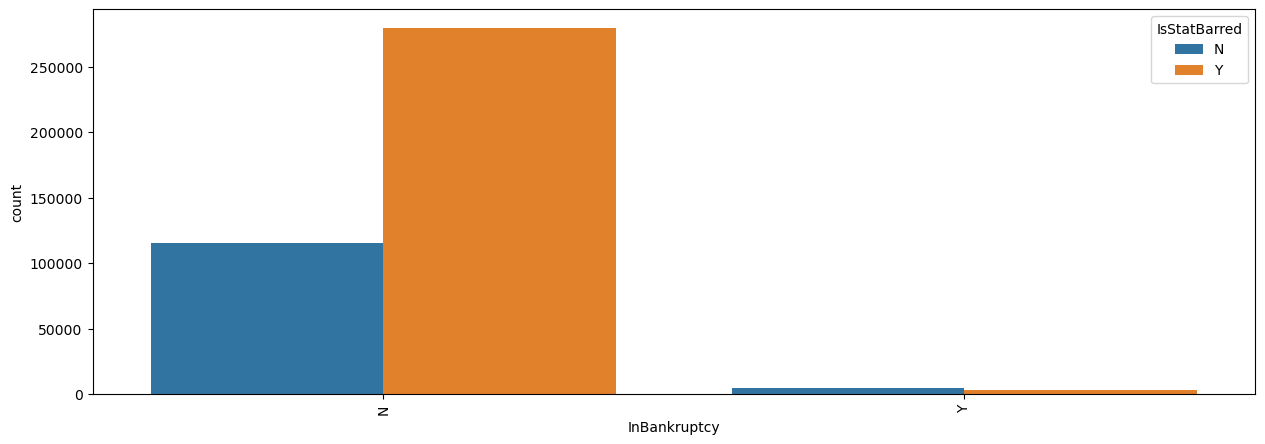

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['InBankruptcy'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* As for **Bankruptcy**, not being in Bankruptcy is showing more proportion of debts being Statute Barred. This when compared to being in Bankruptcy seems to give the company more bandwidth for debt recovery.

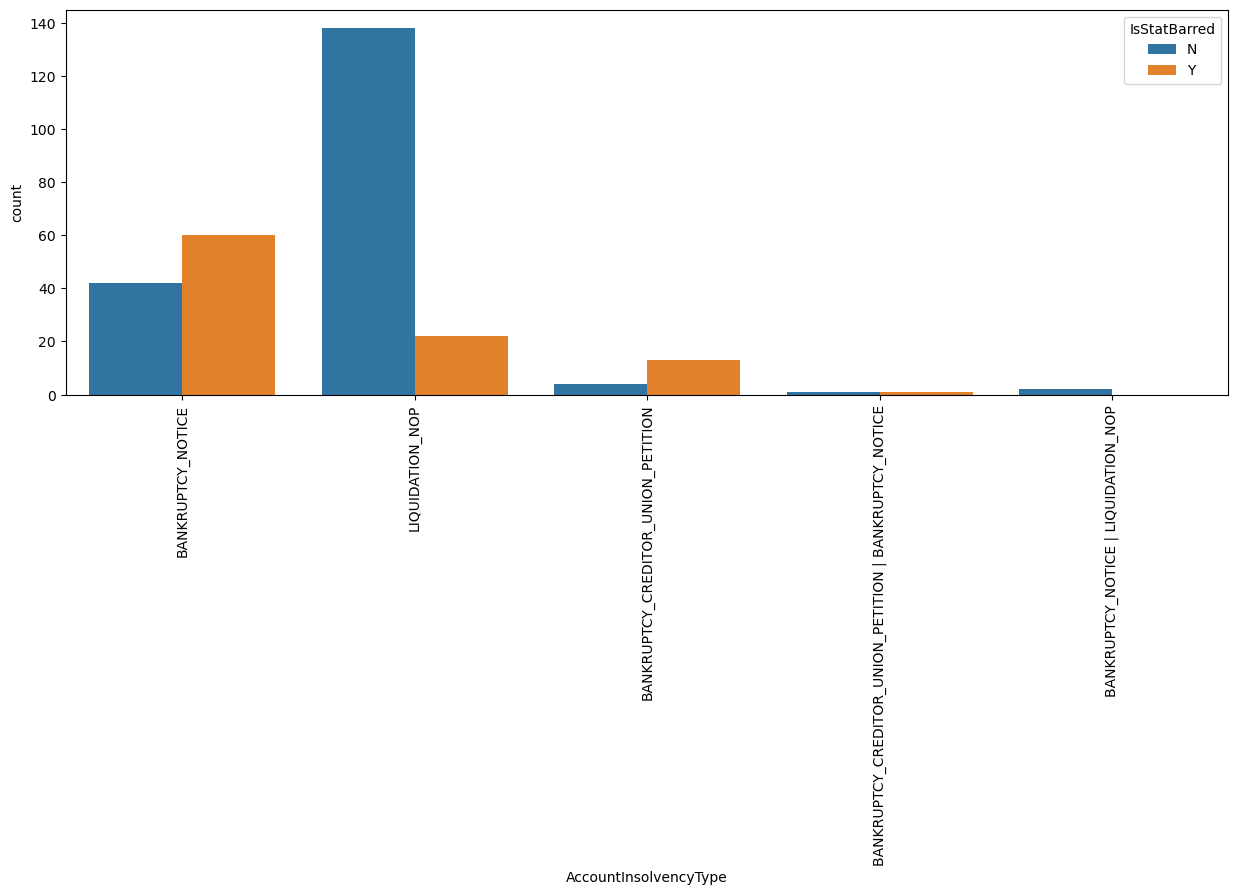

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['AccountInsolvencyType'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* **AccountInsolvencyType** pertains to the financial status or condition of the specific account or debt being managed or collected.
* Here the **Bankruptcy_Notice** shows the most instances of being Statute Barred followed by **Liquidation_NOP**.
* On the other hand, **Liquidation_NOP** looks like a potential candidate to consider when handling the debts involving bankruptcy. This could add significantly to the company(Prima Facie).

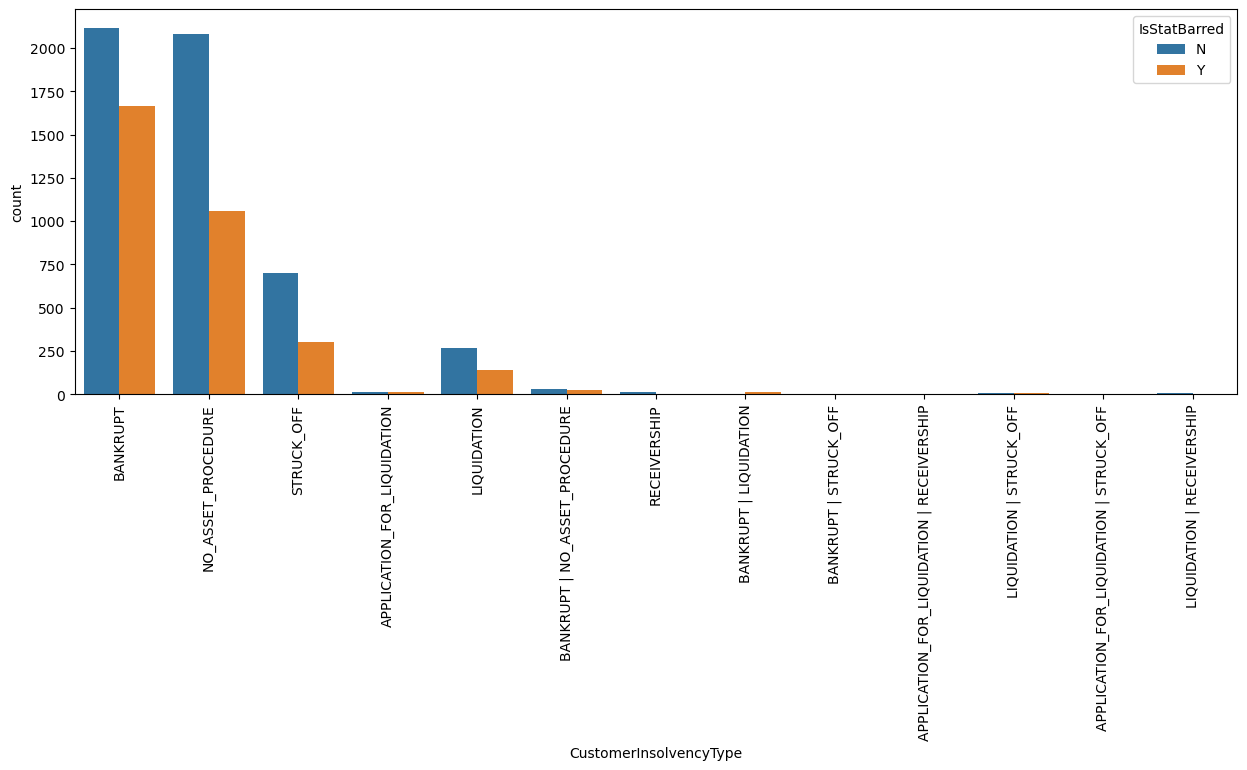

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['CustomerInsolvencyType'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* **CustomerInsolvencyType** relates to the insolvency status or situation of the debtor or customer who owes the debt.
* For **Bankrupt** Customers and those who have filed for **No_Asset_Procedure**, their debts are "more" likely to be "not" Statute Barred.
* It is also to be observed that handling the Customers gone **Bankrupt** is a risky game. Roughly it is 60:40 ratio.

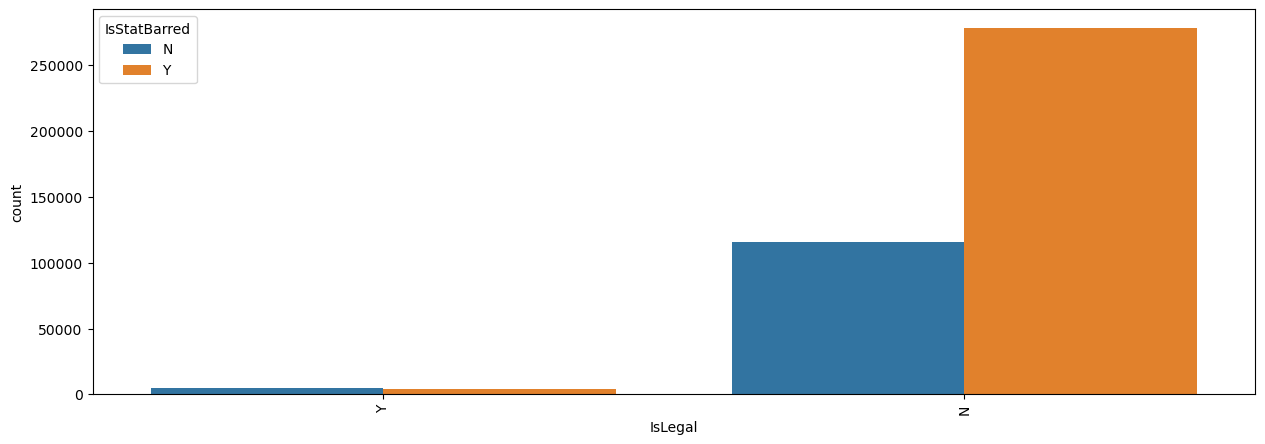

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['IsLegal'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* Surprisingly enough, debts with **IsLegal** Status as **NO** are more prone to being Statute Barred. 

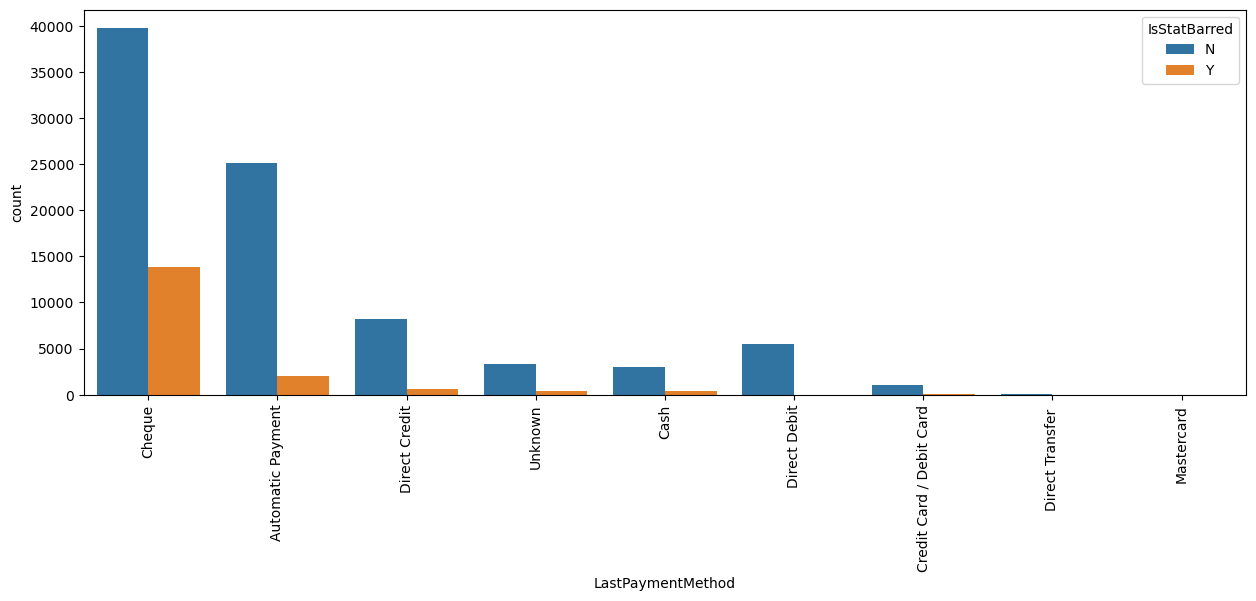

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['LastPaymentMethod'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* **LastPaymentMethod** being **Cheque and Automatic Payment** are more inclined towards not being Statute Barred

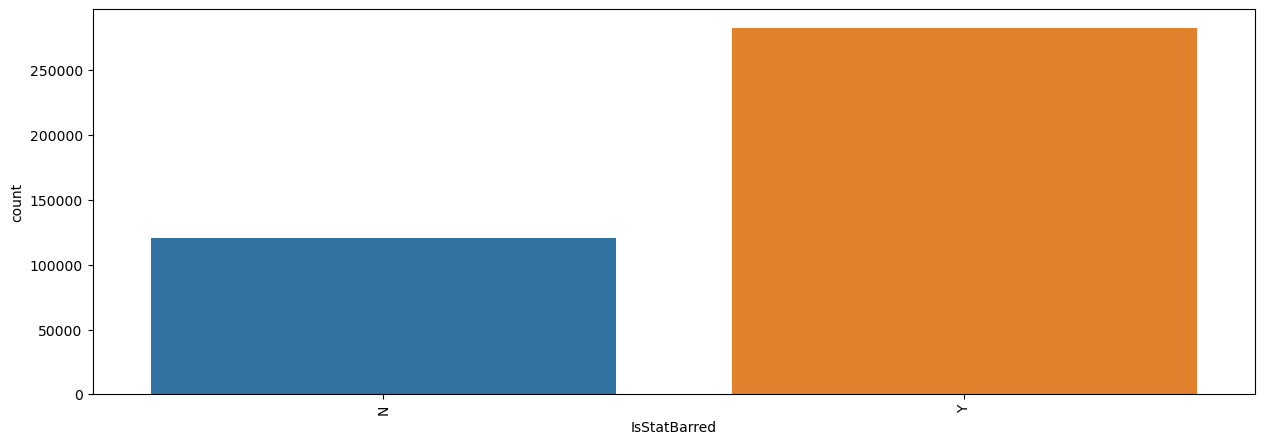

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['IsStatBarred'], data=data)
plt.xticks(rotation='vertical')
plt.show()

* As for our overall data, it looks imbalanced where, Statute Barred "True" status is more than half of that of "False"

In [82]:
data["IsStatBarred"].value_counts()

IsStatBarred
Y    282824
N    120787
Name: count, dtype: int64

* Let's Check for one last thing, that is the individual **Creditors' portfolios** and their share of being Statute Barred.

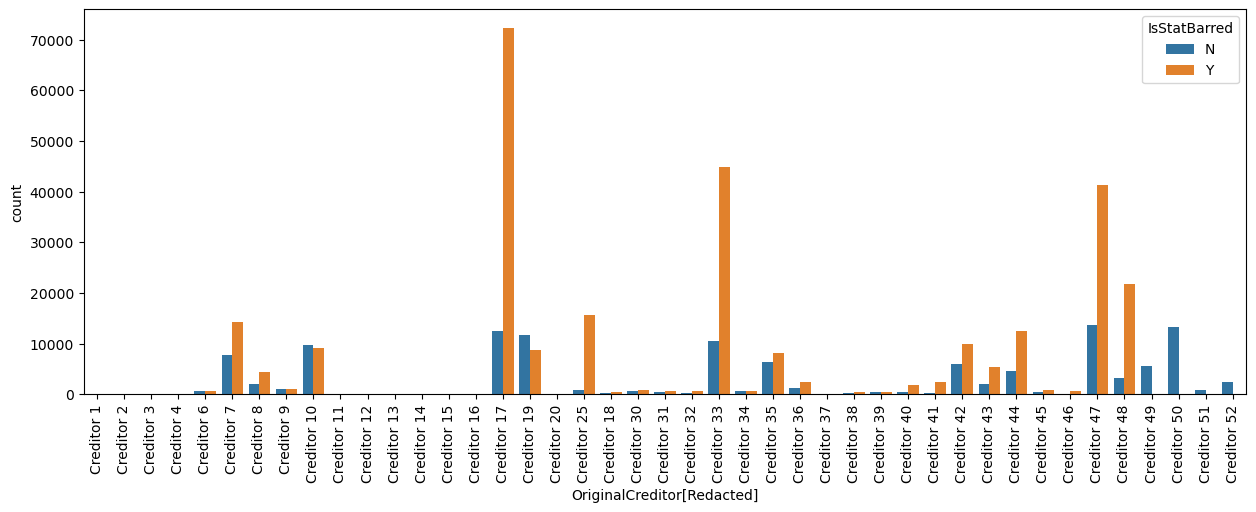

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['OriginalCreditor[Redacted]'],data=data, hue='IsStatBarred')
plt.xticks(rotation='vertical')
plt.show()

* So as per our data, **Creditor 17** who is also top seller of debts to the company, has significantly larger amount of share of products being Statute Barred followed by **Creditor 33 and Creditor 47**.
* The most safe one seem to be **Creditor 50** with almost no Statute Barred debt along with **Creditor 49, 52 and 51**.
* Dealing with **Creditor 6,9,10,30** looks like more risky.

In [84]:
#Separating Feature and target vaariables:

features = data.drop(columns=['IsStatBarred'])
target = data['IsStatBarred']

### 4) Encoding Categorical Features

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

target = pd.DataFrame(label_encoder.fit_transform(target))

In [86]:
features.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,NaN,N,NaN,NaN,1.0,31.0,0,0,1
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,N,5.37,Cheque,1.0,33.0,1,0,1
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,NaN,N,NaN,NaN,1.0,29.0,1,0,1
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1


In [87]:
target.head()

,0
0,0
1,1
2,0
3,1
4,1


In [88]:
cat_cols.remove("IsStatBarred")

In [89]:
cat_cols

['OriginalCreditor[Redacted]',
 'ProductOrDebtType',
 'CollectionStatus',
 'ClosureReason',
 'InBankruptcy',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'IsLegal',
 'LastPaymentMethod']

In [90]:
for col in cat_cols:
    print(data[col].value_counts())
    print("="*30)

OriginalCreditor[Redacted]
Creditor 17    84754
Creditor 33    55316
Creditor 47    54874
Creditor 48    24854
Creditor 7     22079
Creditor 19    20438
Creditor 10    18869
Creditor 44    17230
Creditor 25    16661
Creditor 42    15923
Creditor 35    14474
Creditor 50    13239
Creditor 43     7436
Creditor 8      6544
Creditor 49     5680
Creditor 36     3781
Creditor 41     2759
Creditor 52     2366
Creditor 40     2281
Creditor 9      1982
Creditor 30     1448
Creditor 34     1325
Creditor 6      1319
Creditor 45     1260
Creditor 31     1157
Creditor 39      919
Creditor 51      874
Creditor 32      855
Creditor 46      785
Creditor 18      766
Creditor 38      630
Creditor 3       173
Creditor 20      153
Creditor 37      106
Creditor 11       83
Creditor 12       82
Creditor 13       77
Creditor 14       30
Creditor 4        13
Creditor 1         8
Creditor 2         6
Creditor 15        1
Creditor 16        1
Name: count, dtype: int64
ProductOrDebtType
Utilities/Telco - Other   

In [91]:
features.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,NaN,N,NaN,NaN,1.0,31.0,0,0,1
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,N,5.37,Cheque,1.0,33.0,1,0,1
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,NaN,N,NaN,NaN,1.0,29.0,1,0,1
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1


In [92]:
cols_more_null=[]
for col in cat_cols:
    if features[col].isnull().mean()*100 > 70.00:
        cols_more_null.append(col)

cols_more_null

['ClosureReason',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'LastPaymentMethod']

In [93]:
features.loc[:,'InBankruptcy':'CustomerInsolvencyType'][features['InBankruptcy']=='Y']#.loc[:,'AccountInsolvencyType'].isnull().sum()

,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType
156,Y,NaN,BANKRUPT
547,Y,NaN,NO_ASSET_PROCEDURE
2376,Y,NaN,BANKRUPT
3706,Y,NaN,BANKRUPT
4429,Y,NaN,BANKRUPT
...,...,...,...
402228,Y,NaN,NO_ASSET_PROCEDURE
402330,Y,NaN,BANKRUPT
402336,Y,NaN,NO_ASSET_PROCEDURE
402444,Y,NaN,NO_ASSET_PROCEDURE


* For the columns with null values lets's first fill those null values with "NA" string, so that we can encoding it later

In [94]:
from sklearn.impute import SimpleImputer

In [95]:
simple_impute_const = SimpleImputer(strategy='constant',fill_value="NA")

In [96]:
features[cols_more_null] = simple_impute_const.fit_transform(features[cols_more_null])

In [97]:
features[cols_more_null].isnull().sum()

ClosureReason             0
AccountInsolvencyType     0
CustomerInsolvencyType    0
LastPaymentMethod         0
dtype: int64

* Also, with column "LastPaymentMethod" we left "LastPaymentAmount" column for imputation as well. Let's treat it here now

In [98]:
#It seems more logical to fill NAN values in this column with zero than putting mean or random values or any other method
simple_impute_const1 = SimpleImputer(strategy='constant',fill_value=0)

In [99]:
features['LastPaymentAmount'] = simple_impute_const1.fit_transform(features[['LastPaymentAmount']])

In [100]:
features['LastPaymentAmount'].isnull().sum()

0

* Imputations used so far:
  
1. CCA
2. Random Sample Imputation on "CustomerAge" column
3. simple_impute_const on cols_more_null columns
4. simple_impute_const1 on "LastPaymentAmount"

* From research it has been observed that we can generally put the categories in sequential order as per their importance in judging the Statute Barred status for these columns **'CollectionStatus','ClosureReason','AccountInsolvencyType', 'CustomerInsolvencyType
 'LastPaymentMethod'* (Not Accurate!!)
* * As a result we can go ahead with Ordinal encoding for these columns as followd 

In [101]:
CollectionStatus_list = ["PASSIVE","PAID_IN_FULL","CLOSED",'SETTLED FOR LESS',"LEGAL", "LEGAL_ARRANGEMENT","UNDER_ARRANGEMENT","ACTIVE",
                         "CANCELLED_WITHDRAWN", "NON_COLLECTION", "HOLDING", "PENDING"]
ClosureReason_list = ["Statute Barred","Deceased","Incarcerated","Paid","Disputes/Legal Case Lost","Fraud","Insolvent",
                      "Other Reason - Please see notes","Uneconomical to pursue","Client Instructions","Company Struck Off",
                      "Duplicate Debt","Small Balance","Sensitive Issue","NA"]
AccountInsolvencyType_list = ["BANKRUPTCY_NOTICE | LIQUIDATION_NOP","BANKRUPTCY_CREDITOR_UNION_PETITION | BANKRUPTCY_NOTICE",
                              "BANKRUPTCY_CREDITOR_UNION_PETITION","LIQUIDATION_NOP","BANKRUPTCY_NOTICE","NA"]
CustomerInsolvencyType_list = ["APPLICATION_FOR_LIQUIDATION","APPLICATION_FOR_LIQUIDATION | STRUCK_OFF","APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP",
                               "LIQUIDATION | RECEIVERSHIP","LIQUIDATION | STRUCK_OFF","BANKRUPT | LIQUIDATION","BANKRUPT | STRUCK_OFF",
                               "BANKRUPT | NO_ASSET_PROCEDURE","BANKRUPT","LIQUIDATION","STRUCK_OFF","NO_ASSET_PROCEDURE","RECEIVERSHIP","NA"]
LastPaymentMethod_list = ['Unknown',"Cheque",'Automatic Payment','Direct Credit','Direct Debit','Direct Transfer ','Mastercard',
                          'Credit Card / Debit Card','Cash','NA']

* Putting "NA" last in the preference order given the fact "NA" will be more dominant than other categories. So, keeping at the last preference "might" help diluting that effect of being majority

In [102]:
category_order = [CollectionStatus_list,ClosureReason_list,AccountInsolvencyType_list,CustomerInsolvencyType_list,LastPaymentMethod_list]
cols_ord_encode = ["CollectionStatus","ClosureReason","AccountInsolvencyType","CustomerInsolvencyType","LastPaymentMethod"]

In [103]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=category_order)

In [104]:
features[cols_ord_encode] = ord_encoder.fit_transform(features[cols_ord_encode])

In [105]:
cat_cols

['OriginalCreditor[Redacted]',
 'ProductOrDebtType',
 'CollectionStatus',
 'ClosureReason',
 'InBankruptcy',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'IsLegal',
 'LastPaymentMethod']

In [106]:
ord_encoder1 = OrdinalEncoder()
#col_ord_encode1 = ['OriginalCreditor[Redacted]','ProductOrDebtType','InBankruptcy','IsLegal']
col_ord_encode1 = ['InBankruptcy','IsLegal']

features[col_ord_encode1] = ord_encoder1.fit_transform(features[col_ord_encode1])

In [107]:
features.sample(5)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
392399,99901532,Creditor 52,990432314,3014.91,1806.36,1806.36,9.41,Finance Company - Other,7.0,14.0,...,5.0,13.0,0.0,0.00,9.0,1.0,53.0,0,1,1
138596,3010650,Creditor 25,30289732,690.03,690.03,690.03,11.70,Other,0.0,14.0,...,5.0,13.0,0.0,0.00,9.0,1.0,56.0,0,0,1
276481,99901192,Creditor 19,990114896,0.00,436.37,436.37,7.38,Finance Company - Other,1.0,14.0,...,5.0,13.0,0.0,451.83,7.0,1.0,33.0,1,1,1
78728,3010600,Creditor 17,30208134,572.87,572.87,572.87,3.07,Utilities/Telco - Other,0.0,14.0,...,5.0,13.0,0.0,0.00,9.0,1.0,54.0,0,0,1
86299,3010600,Creditor 17,30215707,652.80,652.80,652.80,3.07,Utilities/Telco - Other,7.0,14.0,...,5.0,13.0,0.0,0.00,9.0,1.0,60.0,0,0,1


In [108]:
#Let's remove EntityID, OriginalCreditor[Redacted] columns for now
features.drop(columns=['EntityID','OriginalCreditor[Redacted]','AccountID'],inplace=True)

In [109]:
features

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.00,1160.20,1160.20,4.22,Other,1.0,14.0,0.0,5.0,13.0,1.0,10.00,1.0,1.0,53.0,0,0,1
1,182.90,182.90,182.90,4.22,Other,8.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,31.0,0,0,1
2,0.00,538.57,538.57,4.22,Other,1.0,14.0,0.0,5.0,13.0,0.0,5.37,1.0,1.0,33.0,1,0,1
3,8279.50,8279.50,8279.50,4.22,Other,0.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,29.0,1,0,1
4,0.00,523.00,523.00,4.22,Other,1.0,14.0,0.0,5.0,13.0,1.0,5.00,1.0,1.0,46.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403606,448.20,448.20,448.20,7.38,Finance Company - Other,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,36.0,1,1,1
403607,1678.37,1678.37,1678.37,7.38,Finance Company - Other,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,37.0,0,1,1
403608,3512.60,3512.60,3512.60,7.38,Finance Company - Other,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,71.0,1,1,1
403609,4477.31,4477.31,4477.31,7.38,Finance Company - Other,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,38.0,1,1,1


#### Binning

In [110]:
features['ProductOrDebtType'] = features['ProductOrDebtType'].replace(
    {"Store Cards":"Utilities/Telco - Other",'Residential Electricity':"Utilities/Telco - Other","Hire Purchase":"Utilities/Telco - Other",
    "Credit Cards":"Finance Company - Other","Bank - Other":"Finance Company - Other","Personal Loans":"Finance Company - Other",
     "Loans":"Finance Company - Other"}
)

features['ProductOrDebtType'].value_counts()

ProductOrDebtType
Utilities/Telco - Other    237958
Finance Company - Other     84125
Other                       81528
Name: count, dtype: int64

In [111]:
one_hot_encoded = pd.get_dummies(features['ProductOrDebtType'], prefix='encoded_column', dtype=int, drop_first=True)

features_trf = pd.concat([features.drop(columns=['ProductOrDebtType']), one_hot_encoded], axis=1)

In [112]:
features_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403611 entries, 0 to 403610
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CurrentBalance                          403611 non-null  float64
 1   DebtLoadPrincipal                       403611 non-null  float64
 2   Balanaceatdebt_load                     403611 non-null  float64
 3   PurchasePrice                           403611 non-null  float64
 4   CollectionStatus                        403611 non-null  float64
 5   ClosureReason                           403611 non-null  float64
 6   InBankruptcy                            403611 non-null  float64
 7   AccountInsolvencyType                   403611 non-null  float64
 8   CustomerInsolvencyType                  403611 non-null  float64
 9   IsLegal                                 403611 non-null  float64
 10  LastPaymentAmount                       4036

### 5) Feature Scaling

In [113]:
features_trf.sample(5)

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,encoded_column_Other,encoded_column_Utilities/Telco - Other
284151,636.02,553.06,553.06,5.34,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,60.0,0,0,0,0,0
226475,2068.37,1880.34,2068.37,4.31,7.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,37.0,0,0,0,0,1
100016,222.93,222.93,222.93,3.07,0.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,50.0,0,0,1,0,1
187267,0.00,476.00,476.00,3.60,1.0,14.0,0.0,5.0,13.0,0.0,1.85,1.0,1.0,36.0,0,0,1,0,1
142019,919.13,919.13,919.13,11.70,0.0,14.0,0.0,5.0,13.0,0.0,0.00,9.0,1.0,51.0,0,0,1,1,0


In [114]:
#CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,LastPaymentAmount
cols_scaling = ["CurrentBalance","DebtLoadPrincipal","Balanaceatdebt_load","LastPaymentAmount"]
cols_not_scaling = list(features_trf.drop(columns=cols_scaling).columns)

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_trf[cols_scaling]),columns=cols_scaling)

In [116]:
features_scaled.sample(5)

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,LastPaymentAmount
110029,0.018953,0.000948,0.000948,0.0
67182,0.019937,0.001471,0.001471,0.0
94880,0.017537,0.000194,0.000194,0.0
389797,0.025773,0.002358,0.002358,0.0
299955,0.018350,0.000570,0.000570,0.0


In [117]:
features_scaled = pd.concat([features_scaled,features_trf[cols_not_scaling]], axis=1)
features_scaled.head(5)

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,LastPaymentAmount,PurchasePrice,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,encoded_column_Other,encoded_column_Utilities/Telco - Other
0,0.017172,0.001374,0.001374,0.000137,4.22,1.0,14.0,0.0,5.0,13.0,1.0,1.0,1.0,53.0,0,0,1,1,0
1,0.017579,0.000217,0.000217,0.000000,4.22,8.0,14.0,0.0,5.0,13.0,0.0,9.0,1.0,31.0,0,0,1,1,0
2,0.017172,0.000638,0.000638,0.000073,4.22,1.0,14.0,0.0,5.0,13.0,0.0,1.0,1.0,33.0,1,0,1,1,0
3,0.035596,0.009806,0.009806,0.000000,4.22,0.0,14.0,0.0,5.0,13.0,0.0,9.0,1.0,29.0,1,0,1,1,0
4,0.017172,0.000619,0.000619,0.000068,4.22,1.0,14.0,0.0,5.0,13.0,1.0,1.0,1.0,46.0,2,0,1,1,0


In [118]:
features_scaled.shape

(403611, 19)

### 6) Imbalance Treatment

In [119]:
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=5)

In [120]:
features_smote, target_smote = smote.fit_resample(features_scaled, target)

In [121]:
print("Class distribution before resampling (SMOTE):")
print("Class 0:", np.sum(target == 0))
print("Class 1:", np.sum(target == 1))
print("Class distribution after resampling (SMOTE):")
print("Class 0:", np.sum(target_smote == 0))
print("Class 1:", np.sum(target_smote == 1))

Class distribution before resampling (SMOTE):
Class 0: 0    120787
dtype: int64
Class 1: 0    282824
dtype: int64
Class distribution after resampling (SMOTE):
Class 0: 0    282824
dtype: int64
Class 1: 0    282824
dtype: int64


In [122]:
features_smote

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,LastPaymentAmount,PurchasePrice,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,encoded_column_Other,encoded_column_Utilities/Telco - Other
0,0.017172,0.001374,0.001374,0.000137,4.220000,1.000000,14.0,0.0,5.0,13.0,1.0,1.0,1.0,53.000000,0,0,1,1,0
1,0.017579,0.000217,0.000217,0.000000,4.220000,8.000000,14.0,0.0,5.0,13.0,0.0,9.0,1.0,31.000000,0,0,1,1,0
2,0.017172,0.000638,0.000638,0.000073,4.220000,1.000000,14.0,0.0,5.0,13.0,0.0,1.0,1.0,33.000000,1,0,1,1,0
3,0.035596,0.009806,0.009806,0.000000,4.220000,0.000000,14.0,0.0,5.0,13.0,0.0,9.0,1.0,29.000000,1,0,1,1,0
4,0.017172,0.000619,0.000619,0.000068,4.220000,1.000000,14.0,0.0,5.0,13.0,1.0,1.0,1.0,46.000000,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565643,0.024740,0.005590,0.005590,0.000780,15.061426,7.000000,14.0,0.0,5.0,13.0,0.0,3.0,1.0,38.000000,1,1,1,0,0
565644,0.020918,0.002204,0.002204,0.000948,7.380000,1.037937,14.0,1.0,5.0,8.0,0.0,3.0,1.0,48.518969,1,1,1,0,0
565645,0.018650,0.000597,0.000769,0.000000,2.284156,2.000000,9.0,0.0,5.0,13.0,0.0,9.0,1.0,41.918535,1,1,1,0,0
565646,0.017971,0.000404,0.000432,0.001580,5.607736,7.000000,14.0,0.0,5.0,13.0,0.0,3.0,1.0,65.000000,0,0,0,0,1


### 7) Train-Test Split

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_smote,target_smote, test_size=0.25, random_state=6)

In [124]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((424236, 19), (141412, 19), (424236, 1), (141412, 1))

### 8) Model Building

#### 8.1 Logisitic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [126]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [127]:
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)

In [128]:
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)
print(acc_lr)
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
f1_lr = f1_score(y_test,y_pred_lr)
print(f1_lr)

0.8653862472774587
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     70511
           1       0.85      0.89      0.87     70901

    accuracy                           0.87    141412
   macro avg       0.87      0.87      0.87    141412
weighted avg       0.87      0.87      0.87    141412

[[59273 11238]
 [ 7798 63103]]
0.8689359827047273


In [129]:
"""print("Model: KNN Classifier")
print("Accuracy Score",acc_knc)
#print(classification_report(y_test,y_pred_lr))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred_knc))
#f1_lr = f1_score(y_test,y_pred_lr)
print("F1 Score",f1_knc)"""

Model: KNN Classifier


NameError: name 'acc_knc' is not defined

#### 8.2 Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test,y_pred_dt)
print(acc_dt)
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
f1_dt = f1_score(y_test,y_pred_dt)
print(f1_dt)

0.9770952960144825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     70511
           1       0.98      0.98      0.98     70901

    accuracy                           0.98    141412
   macro avg       0.98      0.98      0.98    141412
weighted avg       0.98      0.98      0.98    141412

[[68881  1630]
 [ 1609 69292]]
0.9771616733534053


In [132]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
accuracy,accuracy.mean()

(array([0.97772487, 0.97730058, 0.97522629, 0.97614558, 0.97612201,
        0.97628701, 0.97609787, 0.97687575, 0.9766636 , 0.97675789]),
 0.9765201451893171)

#### 8.3 Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [134]:
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [135]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
print(acc_rfc)
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
f1_rfc = f1_score(y_test,y_pred_rfc)
print(f1_rfc)

0.9822150878284728
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     70511
           1       0.99      0.98      0.98     70901

    accuracy                           0.98    141412
   macro avg       0.98      0.98      0.98    141412
weighted avg       0.98      0.98      0.98    141412

[[69754   757]
 [ 1758 69143]]
0.9821379109523369


#### 8.4 Gradient Boosting Classifier

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [137]:
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [138]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
print(acc_gbc)
print(classification_report(y_test,y_pred_gbc))
print(confusion_matrix(y_test,y_pred_gbc))
f1_gbc = f1_score(y_test,y_pred_gbc)
print(f1_gbc)

0.9714239244194269
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     70511
           1       0.97      0.97      0.97     70901

    accuracy                           0.97    141412
   macro avg       0.97      0.97      0.97    141412
weighted avg       0.97      0.97      0.97    141412

[[68751  1760]
 [ 2281 68620]]
0.9713974278211508


#### 8.5 XGBoost Classifier

In [139]:
from xgboost import XGBClassifier
xgc = XGBClassifier()

In [140]:
xgc.fit(X_train,y_train)
y_pred_xgc = xgc.predict(X_test)

In [141]:
acc_xgc = accuracy_score(y_test,y_pred_xgc)
print(acc_xgc)
print(classification_report(y_test,y_pred_xgc))
print(confusion_matrix(y_test,y_pred_xgc))
f1_xgc = f1_score(y_test,y_pred_xgc)
print(f1_xgc)

0.9828303114304302
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     70511
           1       0.99      0.98      0.98     70901

    accuracy                           0.98    141412
   macro avg       0.98      0.98      0.98    141412
weighted avg       0.98      0.98      0.98    141412

[[69759   752]
 [ 1676 69225]]
0.9827652294893454


In [142]:
accuracy = cross_val_score(xgc, X_train, y_train, cv=10, scoring='accuracy')
accuracy,accuracy.mean()

(array([0.98262776, 0.9833349 , 0.98156704, 0.98128418, 0.98187347,
        0.98156704, 0.98246234, 0.98173161, 0.98170804, 0.98177875]),
 0.9819935123532417)

In [143]:
f1 = cross_val_score(xgc, X_train, y_train, cv=10, scoring='f1')
f1,f1.mean()

(array([0.98249531, 0.9832214 , 0.98142077, 0.98113925, 0.98173614,
        0.98141988, 0.98232527, 0.98159538, 0.9815817 , 0.98163852]),
 0.9818573605317777)

#### 8.6 K Nearest Neighbours Classifier

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [145]:
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

In [146]:
acc_knc = accuracy_score(y_test,y_pred_knc)
print(acc_knc)
print(classification_report(y_test,y_pred_knc))
print(confusion_matrix(y_test,y_pred_knc))
f1_knc = f1_score(y_test,y_pred_knc)
print(f1_knc)

0.971621927417758
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     70511
           1       0.98      0.96      0.97     70901

    accuracy                           0.97    141412
   macro avg       0.97      0.97      0.97    141412
weighted avg       0.97      0.97      0.97    141412

[[69197  1314]
 [ 2699 68202]]
0.9714208393570579


In [147]:
"""from sklearn.svm import SVC
svc = SVC(kernel='linear')"""

"from sklearn.svm import SVC\nsvc = SVC(kernel='linear')"

In [148]:
"""svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)"""

'svc.fit(X_train,y_train)\ny_pred_svc = svc.predict(X_test)'

In [149]:
"""print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
print(f1_score(y_test,y_pred_svc))"""

'print(accuracy_score(y_test,y_pred_svc))\nprint(classification_report(y_test,y_pred_svc))\nprint(confusion_matrix(y_test,y_pred_svc))\nprint(f1_score(y_test,y_pred_svc))'

### 9) Comparison of the Models

In [150]:
models = ["Logistic_Regression", "Decision_Tree", "Random_Forest_Classifier", "Gradient_Boosting", "XGBoost", "KN_Classifier"]
model_accuracies = [acc_lr, acc_dt, acc_rfc, acc_gbc, acc_xgc, acc_knc]
model_f1_scores = [f1_lr, f1_dt, f1_rfc, f1_gbc, f1_xgc, f1_knc]

performance_df = pd.DataFrame()

In [151]:
performance_df["Model_Name"] = models
performance_df["Accuracies"] = model_accuracies
performance_df["F1_scores"] = model_f1_scores

In [152]:
performance_df.sort_values("F1_scores", ascending=False)

,Model_Name,Accuracies,F1_scores
4,XGBoost,0.982830,0.982765
2,Random_Forest_Classifier,0.982215,0.982138
1,Decision_Tree,0.977095,0.977162
5,KN_Classifier,0.971622,0.971421
3,Gradient_Boosting,0.971424,0.971397
0,Logistic_Regression,0.865386,0.868936


### Why lookout for F1-score?

* As we are working on identifying the IsStatBarred status for a given set of inputs pertaining to a debt, it is important to identify what kind of mistake our model is making while predicting the status.
* If we analyse both scenarios for Statute Barred status, having a "False Positive mistake" and having a "False Negative mistake", both of these have their significant impact on the company's resources.
* **False Positive(Type I error):** Not Pursuing a debt which should have, otherwise, been pursued will make the company *"miss out on a significant amount of profit"*.
* **False Negative(Type II error):** Pursuing a Debt recovery which is bound to be statute barred will *"waste company's resources"*, bringing loss to the company.

* Therefore, we cannot simply prefer one over the other (i.e. Type I error over Type II error and vice versa).
* Precision helps in focusing more on Type I error, whereas Recall helps in focusing more on Type II error.
* As we want to focus on both errors, we are choosing F1-score, which will help us finding the right balance between Precision and Recall.

##### Plotting Receiver Operating Characteristics- ROC curve and finding AUC for each model:

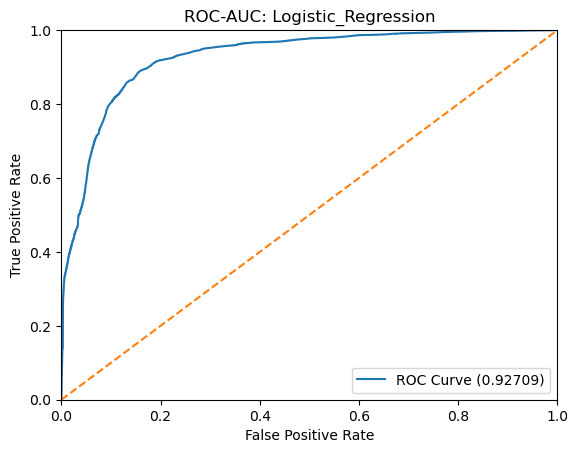

In [153]:
y_score = lr.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.00])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Logistic_Regression")
plt.legend(loc='lower right')
plt.show()

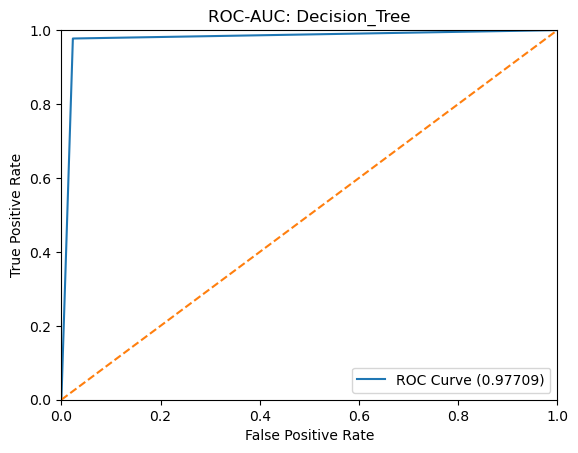

In [154]:
y_score = dt.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.00])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Decision_Tree")
plt.legend(loc='lower right')
plt.show()

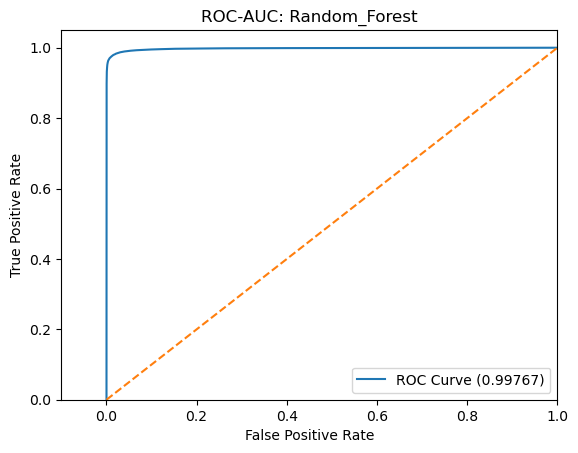

In [155]:
y_score = rfc.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([-0.1,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Random_Forest")
plt.legend(loc='lower right')
plt.show()

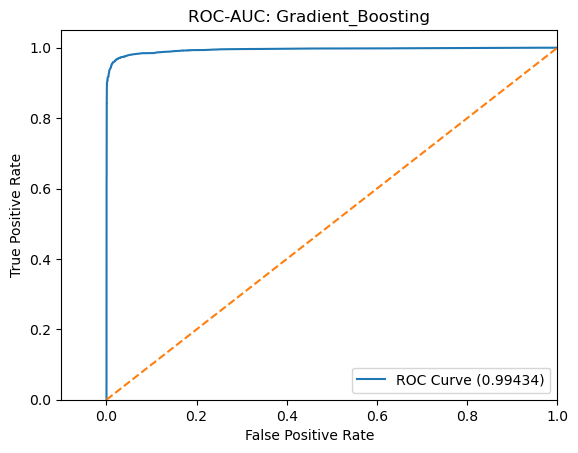

In [156]:
y_score = gbc.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([-0.1,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Gradient_Boosting")
plt.legend(loc='lower right')
plt.show()

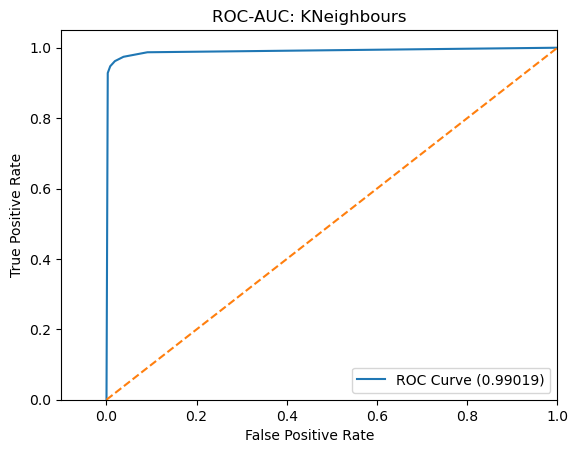

In [157]:
y_score = knc.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([-0.1,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: KNeighbours")
plt.legend(loc='lower right')
plt.show()

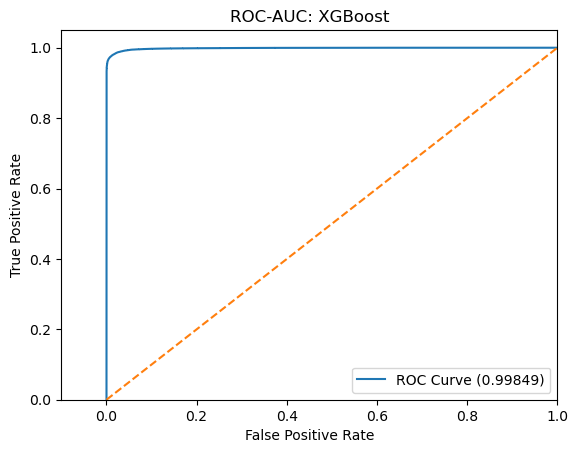

In [158]:
y_score = xgc.predict_proba(X_test)[:,1]  #probability of being positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test,y_score)
auc_score

#auc(fpr,tpr) alternative

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.5f)" % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlim([-0.1,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: XGBoost")
plt.legend(loc='lower right')
plt.show()

* For all the models that we tried: Logistic Regression, Descision Tree, Random Forest, Gradient Boost, XG Boost, K-Nearest Neighbhour, we compared the ROC-AUC for all, bringing us to the conclusion that **XGBoost** is performing the best on our dataset.

### 10) HyperParameter Tuning on XGBoost

In [159]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xgc, 
                   param_grid={
                       'learning_rate':[0.01,0.1,0.2],
                       'max_depth':[10,25,50,100],
                       'n_estimators':[100,150,200,250]
                   }, cv=5, scoring='accuracy',n_jobs=-1)

In [162]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 25, 50, 100],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [163]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 250}

In [164]:
grid.best_score_

0.9837496091538274

In [165]:
final_model = grid.best_estimator_

In [166]:
final_model.score(X_test, y_test)

0.984930557519871

### 11) Best Features- Feature Importance

In [167]:
feature_imp = pd.DataFrame({"Features":features_smote.columns,'Importance':final_model.feature_importances_}).sort_values('Importance',ascending=False,ignore_index=True)

In [168]:
feature_imp

,Features,Importance
0,LastPaymentMethod,0.465594
1,CollectionStatus,0.301059
2,PurchasePrice,0.074900
3,ClosureReason,0.027192
4,NumEmails,0.025320
5,encoded_column_Utilities/Telco - Other,0.021146
6,IsLegal,0.013889
7,encoded_column_Other,0.012719
8,CurrentBalance,0.009770
9,InBankruptcy,0.008452


In [169]:
y_hat = final_model.predict(X_test)

In [170]:
accuracy_score(y_test, y_hat)

0.984930557519871

In [16]:
lst= [10,20,30,40,50,60]
lst1 = []

for i in range(len(lst)-1,-1,-1):
    lst1.append(lst[i])

print(lst1)

[60, 50, 40, 30, 20, 10]


In [5]:
range(len(lst)-1,0)

range(5, 0)

In [9]:
for i in range(len(lst)-1,0,-1):
    print(i)

5
4
3
2
1
